In [1]:
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# 训练 ElasticNet 模型
from sklearn.linear_model import ElasticNet

In [2]:
def lasso(n_samples, n_features):
    # randn(...)产生的是正态分布的数据
    X = np.random.randn(n_samples, n_features)
    coef = 3 * np.random.randn(n_features)  # 每个特征对应一个系数
    inds = np.arange(n_features)
    np.random.shuffle(inds)
    coef[inds[10:]] = 0  # 稀疏化系数--随机的把系数向量1x200的其中10个值变为0
    y = np.dot(X, coef)  # 线性运算 -- y = X.*w
    # 添加噪声：零均值，标准差为 0.01 的高斯噪声
    y += 0.01 * np.random.normal(size=n_samples)

    # 把数据划分成训练集和测试集
    n_samples = X.shape[0]
    X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
    X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

    alpha = 0.1
    lasso = Lasso(alpha=alpha)
    y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
    r2_score_lasso = r2_score(y_test, y_pred_lasso)
    print(lasso)
    print("r^2 on test data : %f" % r2_score_lasso)
    return alpha, X_train, y_train, X_test, y_test, r2_score_lasso, coef, lasso

In [3]:
def view(alpha, X_train, y_train, X_test, y_test, r2_score_lasso, coef, lasso):
    """
    此函数用来做数据可视化
    :param alpha:
    :param X_train:
    :param y_train:
    :param X_test:
    :param y_test:
    :param r2_score_lasso:
    :return:
    """
    enet = ElasticNet(alpha=alpha, l1_ratio=0.7)
    y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
    r2_score_enet = r2_score(y_test, y_pred_enet)
    print(enet)
    print("r^2 on test data : %f" % r2_score_enet)

    plt.plot(enet.coef_, color='lightgreen', linewidth=2,
             label='Elastic net coefficients')
    plt.plot(lasso.coef_, color='gold', linewidth=2,
             label='Lasso coefficients')
    plt.plot(coef, '--', color='navy', label='original coefficients')
    plt.legend(loc='best')
    plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
              % (r2_score_lasso, r2_score_enet))
    plt.show()

Lasso(alpha=0.1)
r^2 on test data : 0.385982
ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.240498


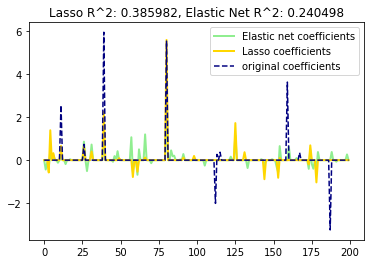

In [4]:
# 产生一些稀疏数据
np.random.seed(42)
n_samples, n_features = 50, 200
alpha, X_train, y_train, X_test, y_test, r2_score_lasso, coef, lasso = lasso(n_samples, n_features)
view(alpha, X_train, y_train, X_test, y_test, r2_score_lasso, coef, lasso)